# Exploratory Data Analysis using Python


Analysing global under5 Death rates

You can find the raw data & official analysis here: https://platform.who.int/data/maternal-newborn-child-adolescent-ageing/indicator-explorer-new/mca/number-of-under-five-deaths---by-cause

![](https://i.imgur.com/dMJdb8M.png)

There are several options for getting the dataset into Jupyter:

- Download the CSV manually and upload it via Jupyter's GUI
- Use the urlretrieve function from the urllib.request to download CSV files from a raw URL
- Use a helper library, e.g., opendatasets, which contains a collection of curated datasets and provides a helper function for direct download.

I have downloaded the csv manually and uploaded it via Jupyter's GUI

In [211]:
!pip install opendatasets --upgrade

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.


In [212]:
#Download the CSV manually and upload it via Jupyter's GUI

import pandas as pd

In [213]:
data_filename = 'Under 5 mortality rate.csv'

In [214]:
df = pd.read_csv(data_filename)

In [215]:
df

,Indicator,Year,Country,Global,WHO region,World bank income group,Age group,Cause,Datasource short,Datasource long,Value Numeric,Value String
0,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,Diarrhoeal diseases,MCEE,Maternal and Child Epidemiology Estimation (MCEE),559274.00000,559274.00000
1,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,Malaria,MCEE,Maternal and Child Epidemiology Estimation (MCEE),764140.30000,764140.30000
2,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,Birth asphyxia and birth trauma,MCEE,Maternal and Child Epidemiology Estimation (MCEE),278103.80000,278103.80000
3,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,Sepsis and other infectious conditions of the ...,MCEE,Maternal and Child Epidemiology Estimation (MCEE),96900.48000,96900.48000
4,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,Tetanus,MCEE,Maternal and Child Epidemiology Estimation (MCEE),20040.15000,20040.15000
...,...,...,...,...,...,...,...,...,...,...,...,...
56275,Number of under-five deaths - by cause,2019,Zimbabwe,NaN,Africa,Lower middle income,0-4,Tetanus,MCEE,Maternal and Child Epidemiology Estimation (MCEE),17.00352,17.00352
56276,Number of under-five deaths - by cause,2019,Zimbabwe,NaN,Africa,Lower middle income,0-4,Prematurity,MCEE,Maternal and Child Epidemiology Estimation (MCEE),5191.70300,5191.70300
56277,Number of under-five deaths - by cause,2019,Zimbabwe,NaN,Africa,Lower middle income,0-4,HIV/AIDS,MCEE,Maternal and Child Epidemiology Estimation (MCEE),2104.11800,2104.11800
56278,Number of under-five deaths - by cause,2019,Zimbabwe,NaN,Africa,Lower middle income,0-4,Injuries,MCEE,Maternal and Child Epidemiology Estimation (MCEE),1329.72300,1329.72300


In [216]:
df.columns

Index(['Indicator', 'Year', 'Country', 'Global', 'WHO region',
       'World bank income group', 'Age group', 'Cause', 'Datasource short',
       'Datasource long', 'Value Numeric', 'Value String'],
      dtype='object')

In [217]:
len(df.columns)

12

In [218]:
#find the no of rows
len(df)

56280

### Data Preparation & Cleaning While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

#### Clean the data:
- Take a copy of the dataset and work on that. Any changes made on the copy will not affect the main dataset
- change the name of column to avoid syntax errors
- Use describe to roughly check the average deaths in total 
- check for null values
- Remove unwanted columns
- Change the column names if you want
- check if Global column below is sum of all the other regions, 
- if yes remove the column Global and remove the rows which says global under region
- Check if Value_Numeric and Value_string have same values 
- if yes remove the column Value_string
    

### Data Analysis and visualisation
Columns we will analyse

- Year
- Cause
- Region
- Income group

#### Problem Statement
##### Year
- Is there a correlation between the year and mortality rates
- Which cause was the reason for highest death rates every year

##### Cause
- Maximum death rates by each cause
- Which cause was the reason for most no of deaths overall
- Total death rate due to each cause throughout the years

##### Region
- Which region(along with the cause) has the highest death rates due to vaccine preventable diseases
- a. What is the cause for highest death rates due to vaccine preventable diseases
- b) Which region has the highest death rates due to vaccine preventable diseases
- Which region has the highest number of under 5 mortality rates
- Death rates by contagious diseases(ALRTI,Sepsis and other infectious conditions of the newborn,HIV,diarrhoeal diseases) and other disease conditions in all the regions
- Look for South east region death rate distribution
- Look for India's data 

##### Income group
- Which income group people have most death rates
- Take out Income group for all the countries
- Find out the which Region has which income groups

Let's extract a copy of the data from these columns into a new data frame survey_df. We can continue to modify further without affecting the original data frame.

In [219]:
copy_df = df.copy()

In [220]:
copy_df.shape

#The dataset has 56280 rows and 12 columns

(56280, 12)

In [221]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56280 entries, 0 to 56279
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Indicator                56280 non-null  object 
 1   Year                     56280 non-null  int64  
 2   Country                  54320 non-null  object 
 3   Global                   280 non-null    object 
 4   WHO region               56280 non-null  object 
 5   World bank income group  53480 non-null  object 
 6   Age group                56280 non-null  object 
 7   Cause                    56280 non-null  object 
 8   Datasource short         56280 non-null  object 
 9   Datasource long          56280 non-null  object 
 10  Value Numeric            56280 non-null  float64
 11  Value String             56280 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 5.2+ MB


In [222]:
copy_df.["Datasource short"].unique()

SyntaxError: invalid syntax (3017677630.py, line 1)

In [223]:
display(copy_df)

,Indicator,Year,Country,Global,WHO region,World bank income group,Age group,Cause,Datasource short,Datasource long,Value Numeric,Value String
0,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,Diarrhoeal diseases,MCEE,Maternal and Child Epidemiology Estimation (MCEE),559274.00000,559274.00000
1,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,Malaria,MCEE,Maternal and Child Epidemiology Estimation (MCEE),764140.30000,764140.30000
2,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,Birth asphyxia and birth trauma,MCEE,Maternal and Child Epidemiology Estimation (MCEE),278103.80000,278103.80000
3,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,Sepsis and other infectious conditions of the ...,MCEE,Maternal and Child Epidemiology Estimation (MCEE),96900.48000,96900.48000
4,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,Tetanus,MCEE,Maternal and Child Epidemiology Estimation (MCEE),20040.15000,20040.15000
...,...,...,...,...,...,...,...,...,...,...,...,...
56275,Number of under-five deaths - by cause,2019,Zimbabwe,NaN,Africa,Lower middle income,0-4,Tetanus,MCEE,Maternal and Child Epidemiology Estimation (MCEE),17.00352,17.00352
56276,Number of under-five deaths - by cause,2019,Zimbabwe,NaN,Africa,Lower middle income,0-4,Prematurity,MCEE,Maternal and Child Epidemiology Estimation (MCEE),5191.70300,5191.70300
56277,Number of under-five deaths - by cause,2019,Zimbabwe,NaN,Africa,Lower middle income,0-4,HIV/AIDS,MCEE,Maternal and Child Epidemiology Estimation (MCEE),2104.11800,2104.11800
56278,Number of under-five deaths - by cause,2019,Zimbabwe,NaN,Africa,Lower middle income,0-4,Injuries,MCEE,Maternal and Child Epidemiology Estimation (MCEE),1329.72300,1329.72300


In [224]:
#Change the column names to avoid syntax errors

dict = {'WHO region': 'Region',
        'World bank income group': 'Income_group',
        'Age group': 'Age_group',
        'Datasource short': 'Datasource_short',
       'Datasource long': 'Datasource_long',
       'Value Numeric': 'Value_Numeric'}


In [225]:
copy_df.rename(columns=dict,
              inplace=True)

In [226]:
display(copy_df)

,Indicator,Year,Country,Global,Region,Income_group,Age_group,Cause,Datasource_short,Datasource_long,Value_Numeric,Value String
0,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,Diarrhoeal diseases,MCEE,Maternal and Child Epidemiology Estimation (MCEE),559274.00000,559274.00000
1,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,Malaria,MCEE,Maternal and Child Epidemiology Estimation (MCEE),764140.30000,764140.30000
2,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,Birth asphyxia and birth trauma,MCEE,Maternal and Child Epidemiology Estimation (MCEE),278103.80000,278103.80000
3,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,Sepsis and other infectious conditions of the ...,MCEE,Maternal and Child Epidemiology Estimation (MCEE),96900.48000,96900.48000
4,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,Tetanus,MCEE,Maternal and Child Epidemiology Estimation (MCEE),20040.15000,20040.15000
...,...,...,...,...,...,...,...,...,...,...,...,...
56275,Number of under-five deaths - by cause,2019,Zimbabwe,NaN,Africa,Lower middle income,0-4,Tetanus,MCEE,Maternal and Child Epidemiology Estimation (MCEE),17.00352,17.00352
56276,Number of under-five deaths - by cause,2019,Zimbabwe,NaN,Africa,Lower middle income,0-4,Prematurity,MCEE,Maternal and Child Epidemiology Estimation (MCEE),5191.70300,5191.70300
56277,Number of under-five deaths - by cause,2019,Zimbabwe,NaN,Africa,Lower middle income,0-4,HIV/AIDS,MCEE,Maternal and Child Epidemiology Estimation (MCEE),2104.11800,2104.11800
56278,Number of under-five deaths - by cause,2019,Zimbabwe,NaN,Africa,Lower middle income,0-4,Injuries,MCEE,Maternal and Child Epidemiology Estimation (MCEE),1329.72300,1329.72300


In [227]:
copy_df.describe()


,Year,Value_Numeric,Value String
count,56280.000000,5.628000e+04,5.628000e+04
mean,2009.500000,7.740294e+03,7.740294e+03
std,5.766333,5.591457e+04,5.591457e+04
min,2000.000000,0.000000e+00,0.000000e+00
25%,2004.750000,1.631942e+00,1.631942e+00
50%,2009.500000,6.478563e+01,6.478563e+01
75%,2014.250000,1.051000e+03,1.051000e+03
max,2019.000000,1.645626e+06,1.645626e+06


In [228]:
copy_df.Year[0]

2000

In [229]:
copy_df['Region'].value_counts()

Europe                   15120
Africa                   13440
Americas                 10080
Western Pacific           7840
Eastern Mediterranean     6160
South-East Asia           3360
Global                     280
Name: Region, dtype: int64

##  Is global sum of other region's value numeric

In [230]:
copy_df["Region"].unique()

array(['Africa', 'Americas', 'Eastern Mediterranean', 'Europe', 'Global',
       'South-East Asia', 'Western Pacific'], dtype=object)

#### Check for Null values

In [231]:
copy_df.isna()

,Indicator,Year,Country,Global,Region,Income_group,Age_group,Cause,Datasource_short,Datasource_long,Value_Numeric,Value String
0,False,False,True,True,False,True,False,False,False,False,False,False
1,False,False,True,True,False,True,False,False,False,False,False,False
2,False,False,True,True,False,True,False,False,False,False,False,False
3,False,False,True,True,False,True,False,False,False,False,False,False
4,False,False,True,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
56275,False,False,False,True,False,False,False,False,False,False,False,False
56276,False,False,False,True,False,False,False,False,False,False,False,False
56277,False,False,False,True,False,False,False,False,False,False,False,False
56278,False,False,False,True,False,False,False,False,False,False,False,False


In [232]:
copy_df.isna().sum()

Indicator               0
Year                    0
Country              1960
Global              56000
Region                  0
Income_group         2800
Age_group               0
Cause                   0
Datasource_short        0
Datasource_long         0
Value_Numeric           0
Value String            0
dtype: int64

#### There are 56000 null values in Global, 2800 in Income-group, and 1960 NA data in Country

In [233]:
copy_df.isna().sum().sort_values(ascending = False)

Global              56000
Income_group         2800
Country              1960
Indicator               0
Year                    0
Region                  0
Age_group               0
Cause                   0
Datasource_short        0
Datasource_long         0
Value_Numeric           0
Value String            0
dtype: int64

In [234]:
#To check what comes under Global

bool_series = pd.notnull(copy_df["Global"])
copy_df[bool_series].head()

,Indicator,Year,Country,Global,Region,Income_group,Age_group,Cause,Datasource_short,Datasource_long,Value_Numeric,Value String
1120,Number of under-five deaths - by cause,2000,NaN,Global,Global,NaN,0-4,Malaria,MCEE,Maternal and Child Epidemiology Estimation (MCEE),781047.90,781047.90
1121,Number of under-five deaths - by cause,2000,NaN,Global,Global,NaN,0-4,Diarrhoeal diseases,MCEE,Maternal and Child Epidemiology Estimation (MCEE),1247509.00,1247509.00
1122,Number of under-five deaths - by cause,2000,NaN,Global,Global,NaN,0-4,Sepsis and other infectious conditions of the ...,MCEE,Maternal and Child Epidemiology Estimation (MCEE),284930.80,284930.80
1123,Number of under-five deaths - by cause,2000,NaN,Global,Global,NaN,0-4,Tetanus,MCEE,Maternal and Child Epidemiology Estimation (MCEE),42315.52,42315.52
1124,Number of under-five deaths - by cause,2000,NaN,Global,Global,NaN,0-4,Birth asphyxia and birth trauma,MCEE,Maternal and Child Epidemiology Estimation (MCEE),1001812.00,1001812.00


#### Check if global is the sum of all the other regions value numeric

In [235]:
Regions = ['Africa', 'Americas', 'Eastern Mediterranean', 'Europe',
       'South-East Asia', 'Western Pacific']


In [236]:
Regions_exceptglobal = copy_df[copy_df["Region"].isin(Regions)]

In [237]:
Regions_exceptglobal.groupby(['Region','Cause']).agg({'Value_Numeric':'sum'}).sort_values(by='Value_Numeric',ascending = False )

Value_Numeric
Region          Cause                                                            
Africa          Acute lower respiratory infections                   2.252253e+07
                Malaria                                              2.230026e+07
South-East Asia Prematurity                                          1.744918e+07
Africa          Diarrhoeal diseases                                  1.731109e+07
                Other Group 1 and Other noncommunicable (neonat...   1.612104e+07
...                                                                           ...
Americas        Tetanus                                              5.305139e+03
Europe          Measles                                              1.588353e+03
                Tetanus                                              8.822593e+02
                Malaria                                              2.012807e+01
Americas        Measles                                              1.795129e+01

[84 rows x 1 columns]

In [238]:
Regions1 = Regions_exceptglobal.groupby(['Cause','Year']).sum()

In [239]:
Regions1
#32 lakhs ALRTI in the year 2000 overall except global

Value_Numeric  Value String
Cause                              Year                             
Acute lower respiratory infections 2000   3.291253e+06  3.291253e+06
                                   2001   3.142394e+06  3.142394e+06
                                   2002   3.071055e+06  3.071055e+06
                                   2003   2.964245e+06  2.964245e+06
                                   2004   2.858787e+06  2.858787e+06
...                                                ...           ...
Tuberculosis                       2015   3.005257e+05  3.005257e+05
                                   2016   2.939919e+05  2.939919e+05
                                   2017   2.876020e+05  2.876020e+05
                                   2018   2.772151e+05  2.772151e+05
                                   2019   2.689555e+05  2.689555e+05

[280 rows x 2 columns]

In [240]:
copy_df.loc[copy_df['Region']=='Global'][copy_df['Cause']=='Acute lower respiratory infections'][["Year","Region","Cause","Value_Numeric"]]

#ALRI in 2000 under global is 1645626 
#overall ALRI in 2000 is 3291252 (ie.,1645626 + 1645626 )
#Global is a combination of all the other regions so remove all the global from the dataset

/var/folders/cc/1xwxp6d97r39ljyvc_6vp_3w0000gn/T/ipykernel_2356/2010519445.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  copy_df.loc[copy_df['Region']=='Global'][copy_df['Cause']=='Acute lower respiratory infections'][["Year","Region","Cause","Value_Numeric"]]


,Year,Region,Cause,Value_Numeric
1129,2000,Global,Acute lower respiratory infections,1645626.0
1134,2001,Global,Acute lower respiratory infections,1571197.0
1151,2002,Global,Acute lower respiratory infections,1535527.0
1172,2003,Global,Acute lower respiratory infections,1482123.0
1176,2004,Global,Acute lower respiratory infections,1429394.0
1191,2005,Global,Acute lower respiratory infections,1371261.0
1207,2006,Global,Acute lower respiratory infections,1307328.0
1218,2007,Global,Acute lower respiratory infections,1241392.0
1244,2008,Global,Acute lower respiratory infections,1207455.0
1256,2009,Global,Acute lower respiratory infections,1145890.0


#### Have to remove global from the dataset as it is just the sum of all the other regions 

Remove the column Global and Global in the region also

In [241]:
copy_df.drop('Global', inplace=True, axis=1)

#### Remove columns that you dont want to use

In [242]:
copy_df.drop('Datasource_short', inplace=True, axis=1)


In [243]:
copy_df.head()

,Indicator,Year,Country,Region,Income_group,Age_group,Cause,Datasource_long,Value_Numeric,Value String
0,Number of under-five deaths - by cause,2000,NaN,Africa,NaN,0-4,Diarrhoeal diseases,Maternal and Child Epidemiology Estimation (MCEE),559274.00,559274.00
1,Number of under-five deaths - by cause,2000,NaN,Africa,NaN,0-4,Malaria,Maternal and Child Epidemiology Estimation (MCEE),764140.30,764140.30
2,Number of under-five deaths - by cause,2000,NaN,Africa,NaN,0-4,Birth asphyxia and birth trauma,Maternal and Child Epidemiology Estimation (MCEE),278103.80,278103.80
3,Number of under-five deaths - by cause,2000,NaN,Africa,NaN,0-4,Sepsis and other infectious conditions of the ...,Maternal and Child Epidemiology Estimation (MCEE),96900.48,96900.48
4,Number of under-five deaths - by cause,2000,NaN,Africa,NaN,0-4,Tetanus,Maternal and Child Epidemiology Estimation (MCEE),20040.15,20040.15


#### check if the columns Value_Numeric and Value_String have same values

In [244]:
copy_df[['Value_Numeric','Value String']].apply(lambda d: len(set(d)) == 1, axis=1).nunique() == 1

True

In [245]:
copy_df.drop('Value String', inplace=True, axis=1)

In [246]:
copy_df.head()

,Indicator,Year,Country,Region,Income_group,Age_group,Cause,Datasource_long,Value_Numeric
0,Number of under-five deaths - by cause,2000,NaN,Africa,NaN,0-4,Diarrhoeal diseases,Maternal and Child Epidemiology Estimation (MCEE),559274.00
1,Number of under-five deaths - by cause,2000,NaN,Africa,NaN,0-4,Malaria,Maternal and Child Epidemiology Estimation (MCEE),764140.30
2,Number of under-five deaths - by cause,2000,NaN,Africa,NaN,0-4,Birth asphyxia and birth trauma,Maternal and Child Epidemiology Estimation (MCEE),278103.80
3,Number of under-five deaths - by cause,2000,NaN,Africa,NaN,0-4,Sepsis and other infectious conditions of the ...,Maternal and Child Epidemiology Estimation (MCEE),96900.48
4,Number of under-five deaths - by cause,2000,NaN,Africa,NaN,0-4,Tetanus,Maternal and Child Epidemiology Estimation (MCEE),20040.15


In [247]:
copy_df = copy_df.loc[(copy_df["Region"]!= "Global")]

In [248]:
copy_df 

,Indicator,Year,Country,Region,Income_group,Age_group,Cause,Datasource_long,Value_Numeric
0,Number of under-five deaths - by cause,2000,NaN,Africa,NaN,0-4,Diarrhoeal diseases,Maternal and Child Epidemiology Estimation (MCEE),559274.00000
1,Number of under-five deaths - by cause,2000,NaN,Africa,NaN,0-4,Malaria,Maternal and Child Epidemiology Estimation (MCEE),764140.30000
2,Number of under-five deaths - by cause,2000,NaN,Africa,NaN,0-4,Birth asphyxia and birth trauma,Maternal and Child Epidemiology Estimation (MCEE),278103.80000
3,Number of under-five deaths - by cause,2000,NaN,Africa,NaN,0-4,Sepsis and other infectious conditions of the ...,Maternal and Child Epidemiology Estimation (MCEE),96900.48000
4,Number of under-five deaths - by cause,2000,NaN,Africa,NaN,0-4,Tetanus,Maternal and Child Epidemiology Estimation (MCEE),20040.15000
...,...,...,...,...,...,...,...,...,...
56275,Number of under-five deaths - by cause,2019,Zimbabwe,Africa,Lower middle income,0-4,Tetanus,Maternal and Child Epidemiology Estimation (MCEE),17.00352
56276,Number of under-five deaths - by cause,2019,Zimbabwe,Africa,Lower middle income,0-4,Prematurity,Maternal and Child Epidemiology Estimation (MCEE),5191.70300
56277,Number of under-five deaths - by cause,2019,Zimbabwe,Africa,Lower middle income,0-4,HIV/AIDS,Maternal and Child Epidemiology Estimation (MCEE),2104.11800
56278,Number of under-five deaths - by cause,2019,Zimbabwe,Africa,Lower middle income,0-4,Injuries,Maternal and Child Epidemiology Estimation (MCEE),1329.72300


In [249]:
copy_df.shape

#280 rows with global data is removed

(56000, 9)

## Exploratory Analysis and Visualisation

#### Columns we will analyse

- Year
- Cause
- Region
- Income group

## I. Year

In [250]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#Have set some basic styles
#Have used the darkgrid style from seaborn 
#Have increased the font size and the figure size so that we can see the figures more easily
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### 1.   Correlation between year and deathrates

In [251]:
copy_df['Year'].corr(copy_df['Value_Numeric'],method = 'pearson')

-0.03295015119918235

In [252]:
copy_df['Value_Numeric'].max()

764140.3

In [253]:
Deaths_every_year = copy_df.groupby(['Year']).sum().sort_values(by='Value_Numeric',ascending = False)

In [254]:
Deaths_every_year 
#1 crore = 10 million so its around 19.8 million

,Value_Numeric
Year,
2000,1.983554e+07
2001,1.924353e+07
2002,1.852609e+07
2003,1.803903e+07
2004,1.742043e+07
2005,1.665648e+07
2006,1.592487e+07
2007,1.525364e+07
2008,1.483252e+07


In [255]:
len(copy_df['Year'].unique())

20

#### Between 2000 to 2019 the under 5 death rates had declined

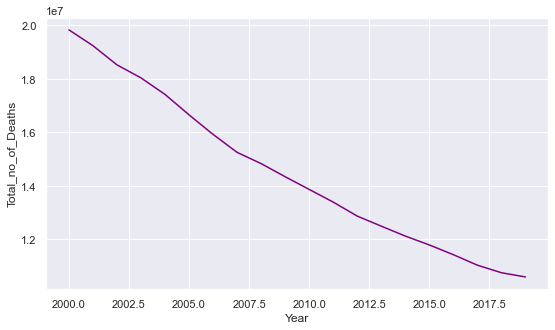

In [256]:
sns.set(style="darkgrid")
sns.lineplot(data = Deaths_every_year , x = 'Year', y ='Value_Numeric', color = 'purple')
plt.ylabel("Total_no_of_Deaths")
plt.show();


In [257]:
Total_no_of_deaths = copy_df.Value_Numeric.sum()

In [258]:
Total_no_of_deaths

290415822.7919204

### 2. Each year what caused the highest under5 mortality rates 
#### From 2000 to 2009 Malaria was the cause for max death rates
#### From 2010 to 2019 Acute lower respiratory tract infection was the cause for max death rates

In [259]:
copy_df.groupby('Year').agg({'Value_Numeric':'max'}).sort_values(by='Value_Numeric',ascending = False )

,Value_Numeric
Year,
2000,764140.3
2001,759150.0
2002,718068.3
2003,694540.3
2004,672826.6
2005,644756.0
2006,633079.4
2007,614444.2
2008,593381.1


In [260]:
copy_df.groupby('Year').agg({'Value_Numeric':'max'}).sort_values(by='Value_Numeric',ascending = False )

,Value_Numeric
Year,
2000,764140.3
2001,759150.0
2002,718068.3
2003,694540.3
2004,672826.6
2005,644756.0
2006,633079.4
2007,614444.2
2008,593381.1


In [261]:
Max_deathrates_eachYear_withCauses = copy_df.sort_values(by='Value_Numeric',ascending = True ).drop_duplicates(['Year'], keep='last')


#### Drop the unwanted columns in Max_deathrates_eachYear_withCauses

In [262]:
Max_deathcauses = Max_deathrates_eachYear_withCauses.drop(['Indicator', 'Age_group', 'Datasource_long'], axis=1)

In [263]:
MaxDeathCause_EveryYear = Max_deathcauses.sort_values(by='Year',ascending = True )

#### From the year 2000 to 2009 Malaria has been the reason for max death rates, followed by ALRTI being the cause of max death rates from the year 2010 to 2019

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '2000'),
  Text(1, 0, '2001'),
  Text(2, 0, '2002'),
  Text(3, 0, '2003'),
  Text(4, 0, '2004'),
  Text(5, 0, '2005'),
  Text(6, 0, '2006'),
  Text(7, 0, '2007'),
  Text(8, 0, '2008'),
  Text(9, 0, '2009'),
  Text(10, 0, '2010'),
  Text(11, 0, '2011'),
  Text(12, 0, '2012'),
  Text(13, 0, '2013'),
  Text(14, 0, '2014'),
  Text(15, 0, '2015'),
  Text(16, 0, '2016'),
  Text(17, 0, '2017'),
  Text(18, 0, '2018'),
  Text(19, 0, '2019')])

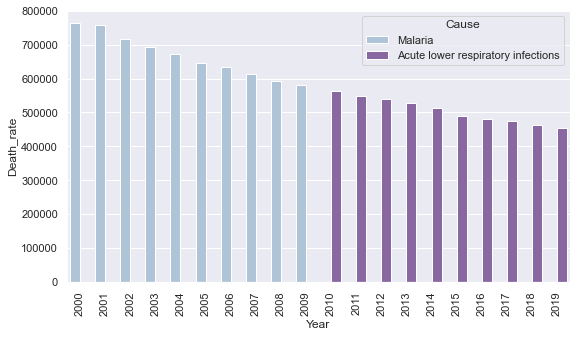

In [264]:
sns.barplot(x ='Year', y ='Value_Numeric', hue="Cause", data = MaxDeathCause_EveryYear,  
            palette ='BuPu')
plt.xlabel("Year")
plt.ylabel("Death_rate")
plt.rcParams['figure.figsize']=(10,5)
plt.xticks(rotation=90)

## II. Cause 

### 1.Maximum death rates by each cause

In [265]:
df = copy_df.groupby(['Cause'])['Value_Numeric'].max()

maxDeathrates_byCausedict = {'Cause': [],'Max death rate':[] }
for index in df.index:
    maxDeathrates_byCausedict['Cause'].append(index)
    maxDeathrates_byCausedict['Max death rate'].append(df[index])


In [266]:
Maximumdeath_rates_by_each_cause = pd.DataFrame(maxDeathrates_byCausedict)

In [267]:
Maximumdeath_rates_by_each_cause

,Cause,Max death rate
0,Acute lower respiratory infections,663216.70
1,Birth asphyxia and birth trauma,388137.60
2,Congenital anomalies,137793.20
3,Diarrhoeal diseases,559274.00
4,HIV/AIDS,223462.50
5,Injuries,133578.30
6,Malaria,764140.30
7,Measles,318581.00
8,Meningitis/encephalitis,132903.70
9,Other Group 1 and Other noncommunicable (neona...,667922.10


#### Malaria has the highest max deaths, followed by ALRTI  and  other non communicable diseases
#### Next most common causes for max death rates are Diarrhoeal diseases and prematurity

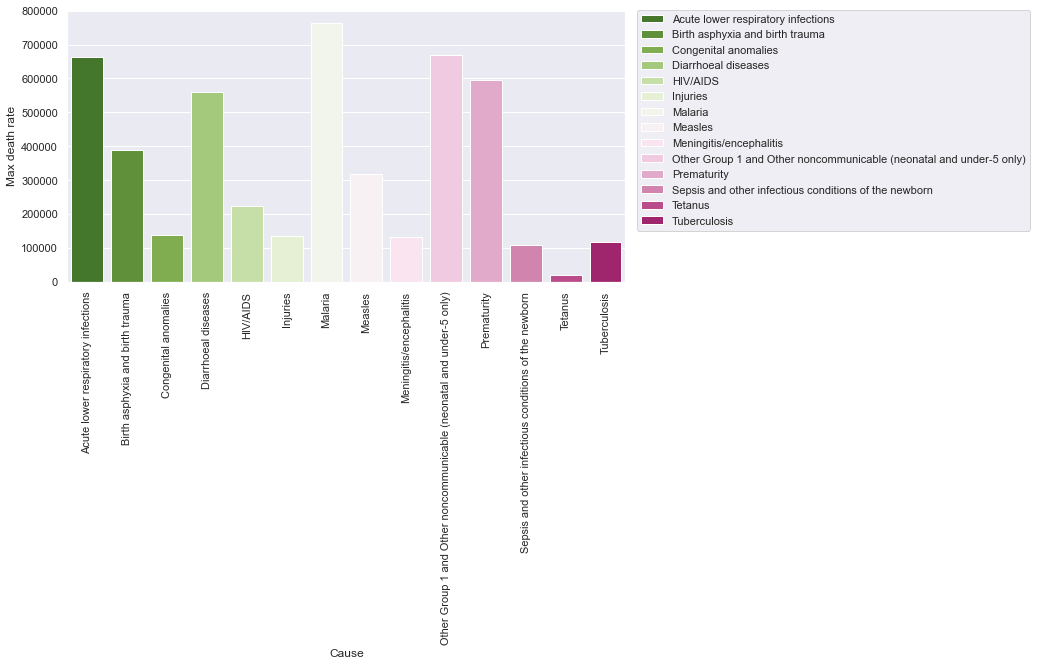

In [268]:
sns.barplot(x ='Cause', y ='Max death rate', hue="Cause", data = Maximumdeath_rates_by_each_cause,  
            palette ='PiYG_r',dodge = False)
plt.rcParams['figure.figsize']=(15,10)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

### 2. Which cause was the reason for maximum deaths overall 

- Take the MaxDeathCause_EveryYear and plot the graph to see which cause has the max death rate

#### Malaria and ALRTI has been the cause for max death rates

(array([0]), [Text(0, 0, 'Africa')])

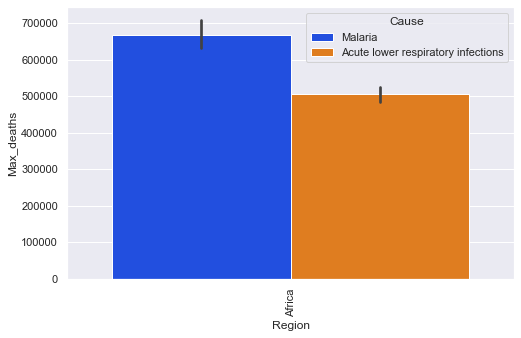

In [272]:
sns.barplot(x ='Region', y ='Value_Numeric', hue="Cause", data = MaxDeathCause_EveryYear,  
            palette ='bright')
plt.ylabel("Max_deaths")
plt.rcParams['figure.figsize']=(8,8)
plt.xticks(rotation=90)


#First red - Africa , next south east asia, followed by green - Eastern ,mediterranean

### 3.Total death rate due to each cause throughout the years

In [273]:
TotalDeaths_byCause = copy_df.groupby(['Cause','Year','Region'], as_index=False)['Value_Numeric'].sum()


In [274]:
Total_deaths_byEachCause_EveryYear = copy_df.groupby(['Cause','Year','Region'], as_index=False)['Value_Numeric'].sum()

In [275]:
Total_deaths_byEachCause_EveryYear_pd = pd.DataFrame(Total_deaths_byEachCause_EveryYear)
#Total_deaths_byEachCause_EveryYear_pd
Total_deaths_byEachCause_EveryYear_pd.rename(columns = {'Value_Numeric':'Death_rate'}, inplace = True)
Total_deaths_byEachCause_EveryYear_pd


,Cause,Year,Region,Death_rate
0,Acute lower respiratory infections,2000,Africa,1.326433e+06
1,Acute lower respiratory infections,2000,Americas,1.105420e+05
2,Acute lower respiratory infections,2000,Eastern Mediterranean,4.085368e+05
3,Acute lower respiratory infections,2000,Europe,6.043642e+04
4,Acute lower respiratory infections,2000,South-East Asia,1.106376e+06
...,...,...,...,...
1675,Tuberculosis,2019,Americas,1.469721e+03
1676,Tuberculosis,2019,Eastern Mediterranean,2.008406e+04
1677,Tuberculosis,2019,Europe,9.819492e+02
1678,Tuberculosis,2019,South-East Asia,1.317596e+05


#### From the below graph ALRTI seems to be the cause of highest death rates globally

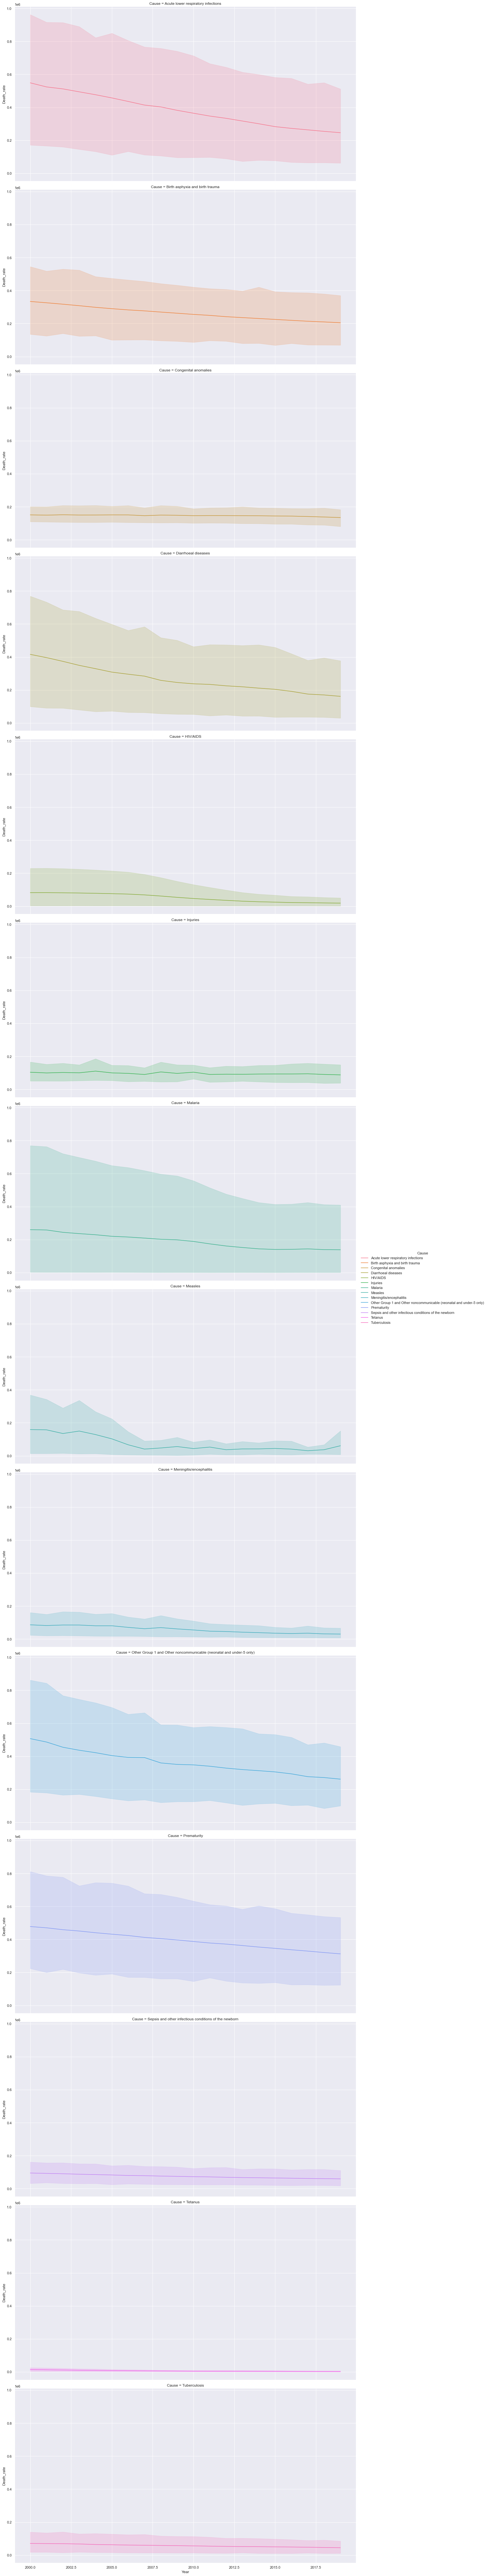

In [276]:
sns.relplot(
    data=Total_deaths_byEachCause_EveryYear_pd, kind="line",
    x="Year", y="Death_rate", hue="Cause",row='Cause',height=8, aspect=2
)

## III. Region 
#### We know malaria and ALRTI are the reason for max death rates but we need to know which region had those max death rates

### 1. Which cause and region has the highest(max) overall under5 death rates
#### Africa had the highest death rates due to both Malaria and ALRTI, followed by South-East Asia due to ALRTI,
#### Europe and America has the lowest death rates of all

In [277]:
# Guess you may have somewhere in the code used plt.xlabel = "Some Label" this will actually change the import of matplotlib.pyplot.
# All we have to do here is simply reload the libraries by typing the following lines of code to fix the error without closing/restarting the notebook:

import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Africa'),
  Text(1, 0, 'Americas'),
  Text(2, 0, 'Eastern Mediterranean'),
  Text(3, 0, 'Europe'),
  Text(4, 0, 'South-East Asia'),
  Text(5, 0, 'Western Pacific')])

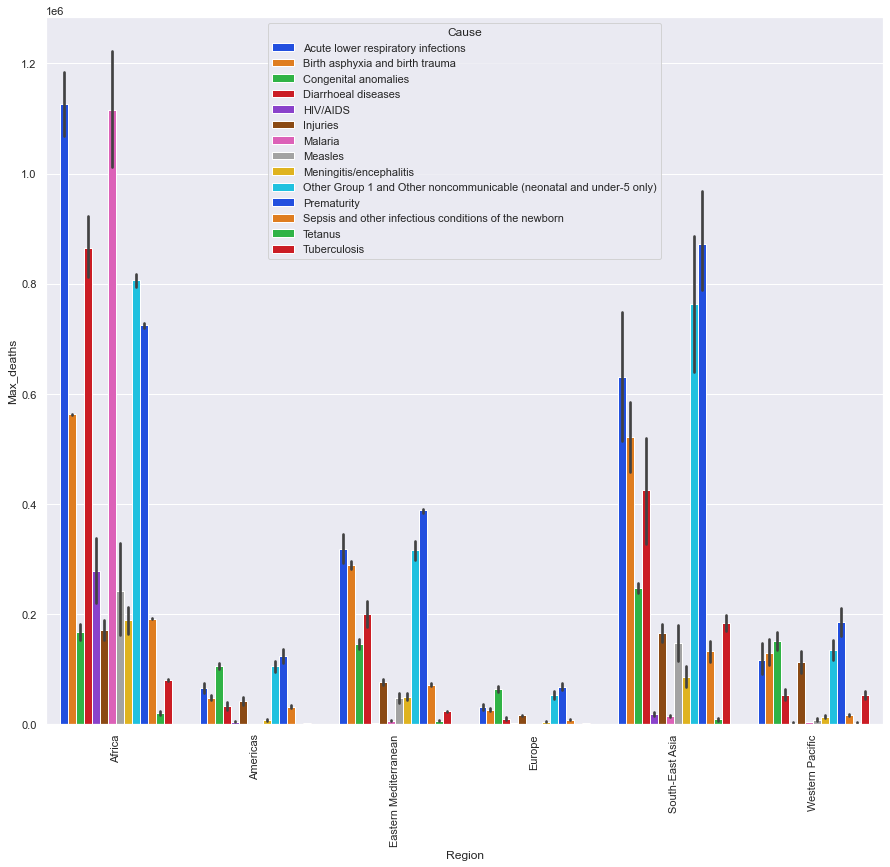

In [279]:
sns.barplot(x ='Region', y ='Value_Numeric', hue="Cause", data = TotalDeaths_byCause, palette = 'bright')
ylabel = "Max_deaths"
plt.ylabel(ylabel)
plt.rcParams['figure.figsize']=(15,13)
plt.xticks(rotation=90)

#I can also take the sum of deaths every year and get the percentage of death rate by each region 

### Death rates due to vaccine preventable diseases each year 
### 2.a) What is the cause for highest death rates due to vaccine preventable diseases
### 2.b) Which region has the highest death rates due to vaccine preventable diseases



In [280]:
Causes = ["Tetanus", "Meningitis/encephalitis", "Tuberculosis", "Measles"]
vaccine_preventable_causes1 = copy_df[copy_df["Cause"].isin(Causes)]

In [281]:

vaccine_preventable_causes1['Cause'].unique()

array(['Tetanus', 'Meningitis/encephalitis', 'Tuberculosis', 'Measles'],
      dtype=object)

In [282]:
vaccine_preventable_diseases = vaccine_preventable_causes1[['Year','Country','Region','Cause','Value_Numeric']]

In [283]:
vaccine_preventable_diseases

,Year,Country,Region,Cause,Value_Numeric
4,2000,NaN,Africa,Tetanus,20040.15000
5,2000,NaN,Africa,Meningitis/encephalitis,132731.60000
9,2000,NaN,Africa,Tuberculosis,35446.09000
12,2000,NaN,Africa,Measles,318581.00000
19,2001,NaN,Africa,Tetanus,18818.68000
...,...,...,...,...,...
56263,2018,Zimbabwe,Africa,Tuberculosis,139.84430
56267,2019,Zimbabwe,Africa,Tuberculosis,207.43900
56272,2019,Zimbabwe,Africa,Measles,25.91552
56273,2019,Zimbabwe,Africa,Meningitis/encephalitis,205.28280


#### Death rates are mostly due to Measles during 2000 to 2006 post which Tuberculosis, measles and meningitis has become the cause for highest death rates.
#### Tetanus have always been the cause for the least death rates

Text(38.27309166666667, 0.5, 'Death_rate')

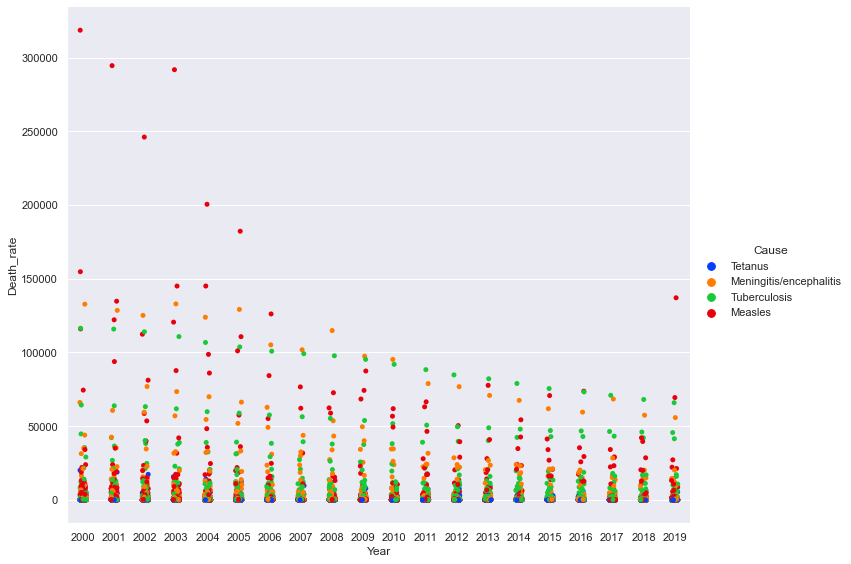

In [284]:
sns.set(font_scale=1.0)
sns.catplot(
    x='Year', 
    y='Value_Numeric', 
    data=vaccine_preventable_diseases,
palette = 'bright',
hue = 'Cause', height = 8, aspect = 1.25)
plt.xlabel(
    'Year')
plt.ylabel(
    'Death_rate')


#### 2.b). Which region has the highest death rates due to vaccine preventable diseases

#### Africa seems to have the highest death rates followed by south east asia, Eastern Mediterranean,western pacific, and lastly Europe and America. 

Text(0, 0.5, 'Death_rate')

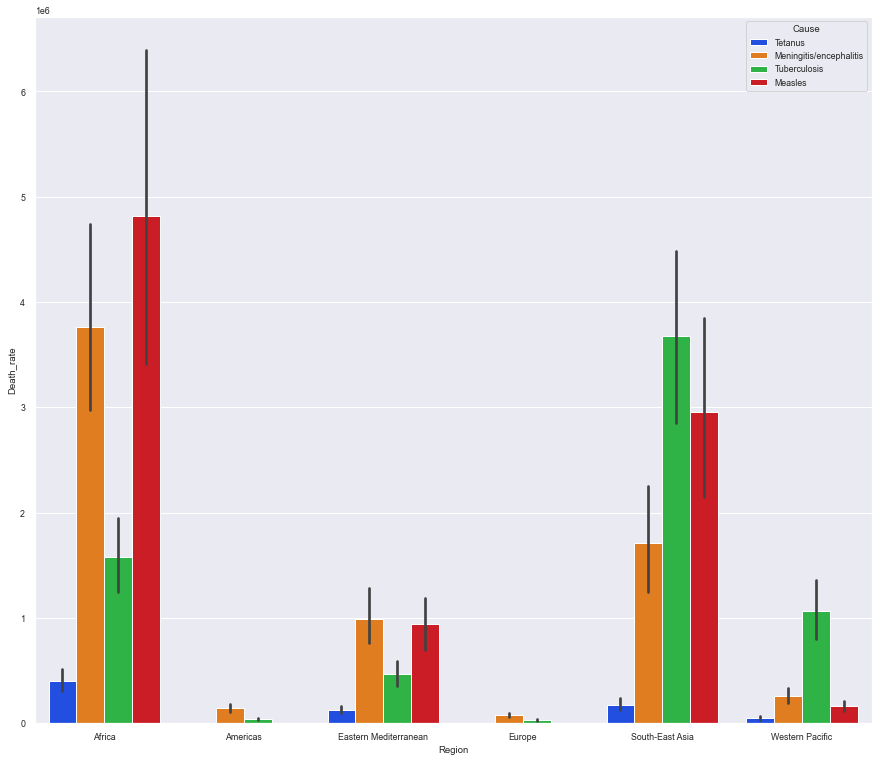

In [285]:
sns.set(font_scale=0.8)
sns.barplot(
    x='Region', 
    y='Value_Numeric', 
    data=vaccine_preventable_diseases,
    palette='bright',
    color='blue',
    hue= 'Cause',
    estimator=sum)
plt.ylabel(
    'Death_rate')


In [286]:
Vaccine_preventable_diseases_2019 = vaccine_preventable_diseases.loc[vaccine_preventable_diseases['Year']==2019][["Year","Region","Country","Cause","Value_Numeric"]]

In [287]:
Vaccine_preventable_diseases_2019

,Year,Region,Country,Cause,Value_Numeric
266,2019,Africa,NaN,Measles,137057.70000
274,2019,Africa,NaN,Meningitis/encephalitis,55772.84000
276,2019,Africa,NaN,Tetanus,5250.36200
279,2019,Africa,NaN,Tuberculosis,41445.97000
546,2019,Americas,NaN,Measles,0.00000
...,...,...,...,...,...
55999,2019,Africa,Zambia,Tetanus,25.96199
56267,2019,Africa,Zimbabwe,Tuberculosis,207.43900
56272,2019,Africa,Zimbabwe,Measles,25.91552
56273,2019,Africa,Zimbabwe,Meningitis/encephalitis,205.28280


#### In the year 2019 Africa still seems to have the highest death rates due to measles among all the other countries
#### South East Asia seems to have max death rates due to Tuberculosis

Text(0, 0.5, 'Death_rate')

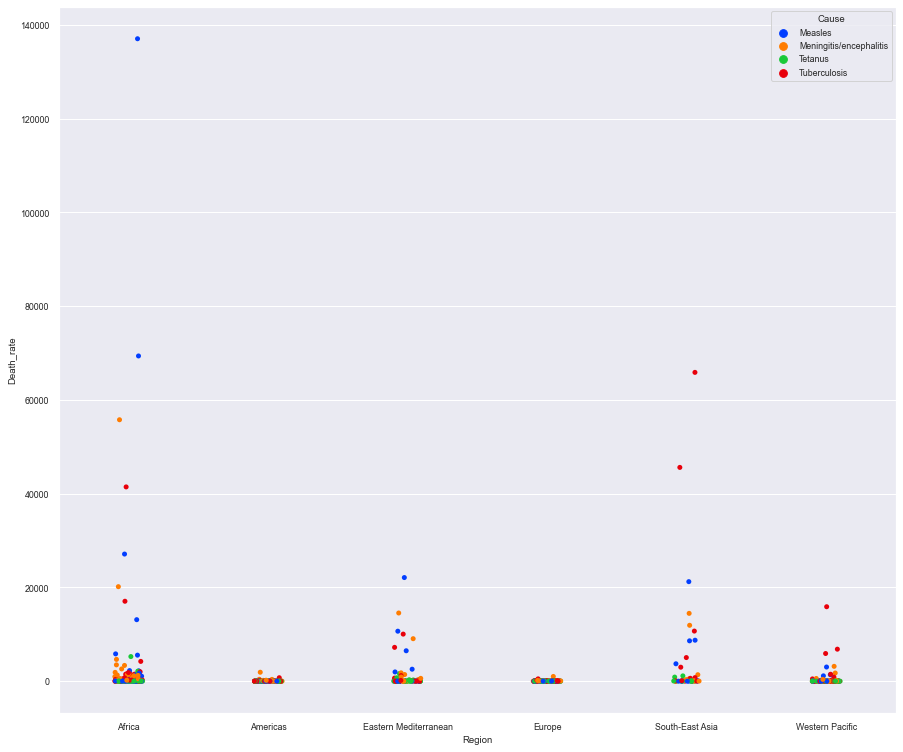

In [288]:
sns.stripplot(x='Region', y='Value_Numeric',hue='Cause',palette='bright', data=Vaccine_preventable_diseases_2019)

plt.ylabel(
    'Death_rate')

### 3. Which region has the highest number of under 5 mortality rates(take the average)

#### South East Asia seems to have the highest under 5 mortality rates overall when the average is taken
#### Average is taken as the population is different for all the regions

In [289]:
TotalDeaths_byRegion = copy_df.groupby(['Year','Region'], as_index=False)['Value_Numeric'].mean().sort_values(by='Value_Numeric',ascending = False)


In [290]:
TotalDeaths_byRegion

,Year,Region,Value_Numeric
4,2000,South-East Asia,39209.622955
10,2001,South-East Asia,37867.786678
16,2002,South-East Asia,36065.401587
22,2003,South-East Asia,34661.990034
28,2004,South-East Asia,33879.744778
...,...,...,...
93,2015,Europe,287.068924
99,2016,Europe,273.148634
105,2017,Europe,259.640117
111,2018,Europe,246.798897


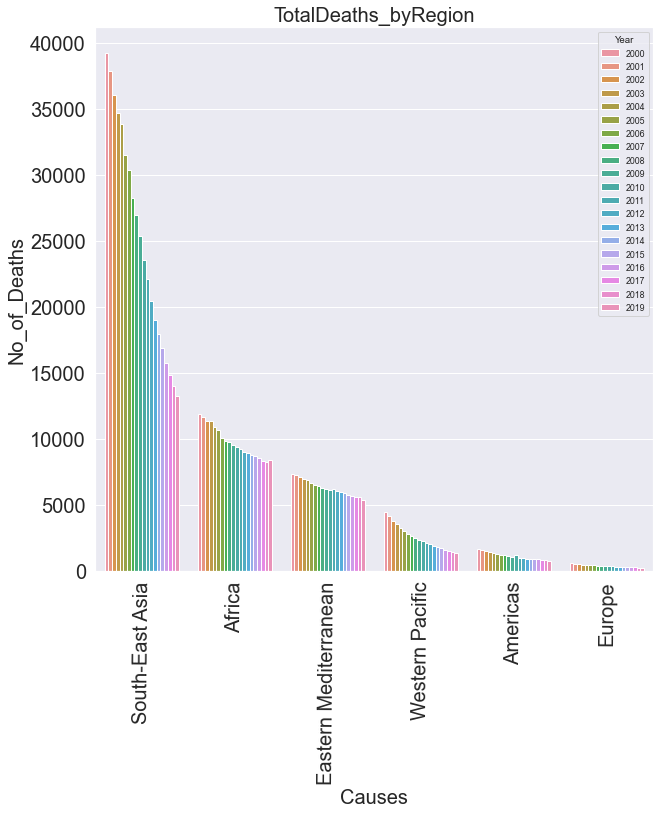

In [291]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=89.5)
plt.title("TotalDeaths_byRegion",fontsize=20)
b = sns.barplot(x=TotalDeaths_byRegion.Region, y=TotalDeaths_byRegion.Value_Numeric, hue =TotalDeaths_byRegion.Year)
plt.xlabel("Causes",fontsize=20)
plt.ylabel("No_of_Deaths",fontsize=20)
# b.set_xlabel("X Label",fontsize=30)
# b.set_ylabel("Y Label",fontsize=20)
plt.tick_params(labelsize=20)
plt.show();

### 4. Death rates by contagious diseases(ALRTI,Sepsis and other infectious conditions of the newborn,HIV,diarrhoeal diseases) and other disease conditions in all the regions 

- Group contagious diseases and other non communicable diseases into 2 groups
- calculate the mean and find which had caused the max death rates
- Look for its distribution in different region, income group

In [292]:
    Disease_type = []
    for row in copy_df['Cause']:
        if row == "Acute lower respiratory infections" :    Disease_type.append('Contagious')
        elif row == "Diarrhoeal diseases":   Disease_type.append('Contagious')
        elif row == "Sepsis and other infectious conditions of the newborn":  Disease_type.append('Contagious')
        elif row == "HIV/AIDS":  Disease_type.append('Contagious')
        elif row == "Tuberculosis":  Disease_type.append('Contagious')
        elif row == "Measles":  Disease_type.append('Contagious')
        
        else:           Disease_type.append('Non-Contagious')

#### Create a new column Disease_type which classifies the disease into contagious / non-contagious

In [293]:
copy_df['Disease_type'] = Disease_type

In [294]:
copy_df

,Indicator,Year,Country,Region,Income_group,Age_group,Cause,Datasource_long,Value_Numeric,Disease_type
0,Number of under-five deaths - by cause,2000,NaN,Africa,NaN,0-4,Diarrhoeal diseases,Maternal and Child Epidemiology Estimation (MCEE),559274.00000,Contagious
1,Number of under-five deaths - by cause,2000,NaN,Africa,NaN,0-4,Malaria,Maternal and Child Epidemiology Estimation (MCEE),764140.30000,Non-Contagious
2,Number of under-five deaths - by cause,2000,NaN,Africa,NaN,0-4,Birth asphyxia and birth trauma,Maternal and Child Epidemiology Estimation (MCEE),278103.80000,Non-Contagious
3,Number of under-five deaths - by cause,2000,NaN,Africa,NaN,0-4,Sepsis and other infectious conditions of the ...,Maternal and Child Epidemiology Estimation (MCEE),96900.48000,Contagious
4,Number of under-five deaths - by cause,2000,NaN,Africa,NaN,0-4,Tetanus,Maternal and Child Epidemiology Estimation (MCEE),20040.15000,Non-Contagious
...,...,...,...,...,...,...,...,...,...,...
56275,Number of under-five deaths - by cause,2019,Zimbabwe,Africa,Lower middle income,0-4,Tetanus,Maternal and Child Epidemiology Estimation (MCEE),17.00352,Non-Contagious
56276,Number of under-five deaths - by cause,2019,Zimbabwe,Africa,Lower middle income,0-4,Prematurity,Maternal and Child Epidemiology Estimation (MCEE),5191.70300,Non-Contagious
56277,Number of under-five deaths - by cause,2019,Zimbabwe,Africa,Lower middle income,0-4,HIV/AIDS,Maternal and Child Epidemiology Estimation (MCEE),2104.11800,Contagious
56278,Number of under-five deaths - by cause,2019,Zimbabwe,Africa,Lower middle income,0-4,Injuries,Maternal and Child Epidemiology Estimation (MCEE),1329.72300,Non-Contagious


In [295]:
Disease_type_classification = copy_df.loc[copy_df["Year"]==2019][["Disease_type","Region","Cause","Value_Numeric"]]

In [296]:
Disease_type_byRegion = Disease_type_classification.groupby(['Disease_type','Cause','Region']).agg({'Value_Numeric':'mean'}).sort_values(by='Value_Numeric',ascending = False )

In [297]:
Disease_type_byRegion

Value_Numeric
Disease_type   Cause                                              Region                        
Non-Contagious Prematurity                                        South-East Asia   45606.467711
               Other Group 1 and Other noncommunicable (neonat... South-East Asia   31820.883316
               Birth asphyxia and birth trauma                    South-East Asia   25466.582776
Contagious     Acute lower respiratory infections                 South-East Asia   19813.969226
                                                                  Africa            18931.125387
...                                                                                          ...
Non-Contagious Tetanus                                            Americas              6.317934
Contagious     Measles                                            Europe                1.741302
Non-Contagious Tetanus                                            Europe                0.250644
               Malaria                                            Europe                0.012784
Contagious     Measles                                            Americas              0.000000

[84 rows x 1 columns]

#### I have taken only year 2019

#### Death rates due to non contagious diseases seems to be higher in all the countries compared to contagious disease
#### one of the reasion may be routine vaccinations are administered for contagious diseases while non contagious diseases however cannot be prevented but can be detected, screened at the early stage and provide access to palliative care for people in need
#### Timely treatment and early treatment can reduce the death rates due to non contagious diseases

Text(0, 0.5, 'Death_rate')

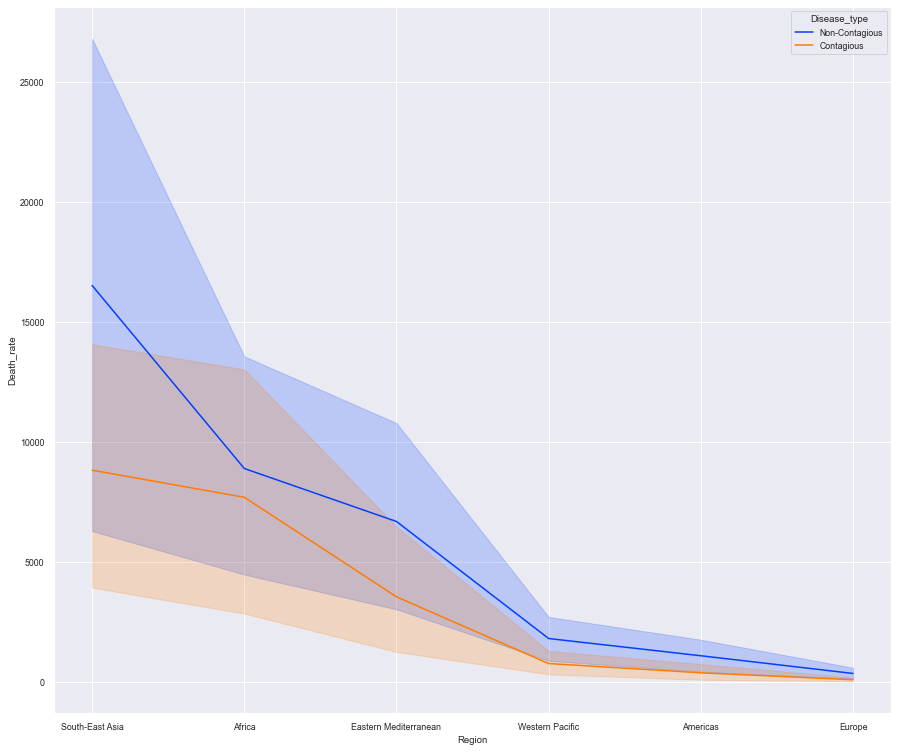

In [300]:
sns.lineplot(x="Region", y="Value_Numeric", hue="Disease_type", data=Disease_type_byRegion,palette='bright')

plt.ylabel("Death_rate",fontsize=10)

#### Take out the south east region 

### 5. Look for South east region death rate distribution

In [301]:
South_East = copy_df.loc[copy_df['Region']=='South-East Asia'][["Year","Cause","Country","Value_Numeric"]]

In [302]:
South_East

,Year,Cause,Country,Value_Numeric
1400,2000,Congenital anomalies,NaN,126782.5000
1401,2000,Measles,NaN,115932.4000
1402,2000,Other Group 1 and Other noncommunicable (neona...,NaN,667922.1000
1403,2000,Acute lower respiratory infections,NaN,553188.2000
1404,2000,Injuries,NaN,85675.3200
...,...,...,...,...
50395,2019,Congenital anomalies,Timor-Leste,111.0467
50396,2019,Malaria,Timor-Leste,0.0000
50397,2019,Measles,Timor-Leste,0.0000
50398,2019,Tuberculosis,Timor-Leste,103.4091


#### India seems to have the highest death rates compared to other South-East asian countries
#### However India's population is higher than all the other countries population

<Figure size 1440x1080 with 0 Axes>

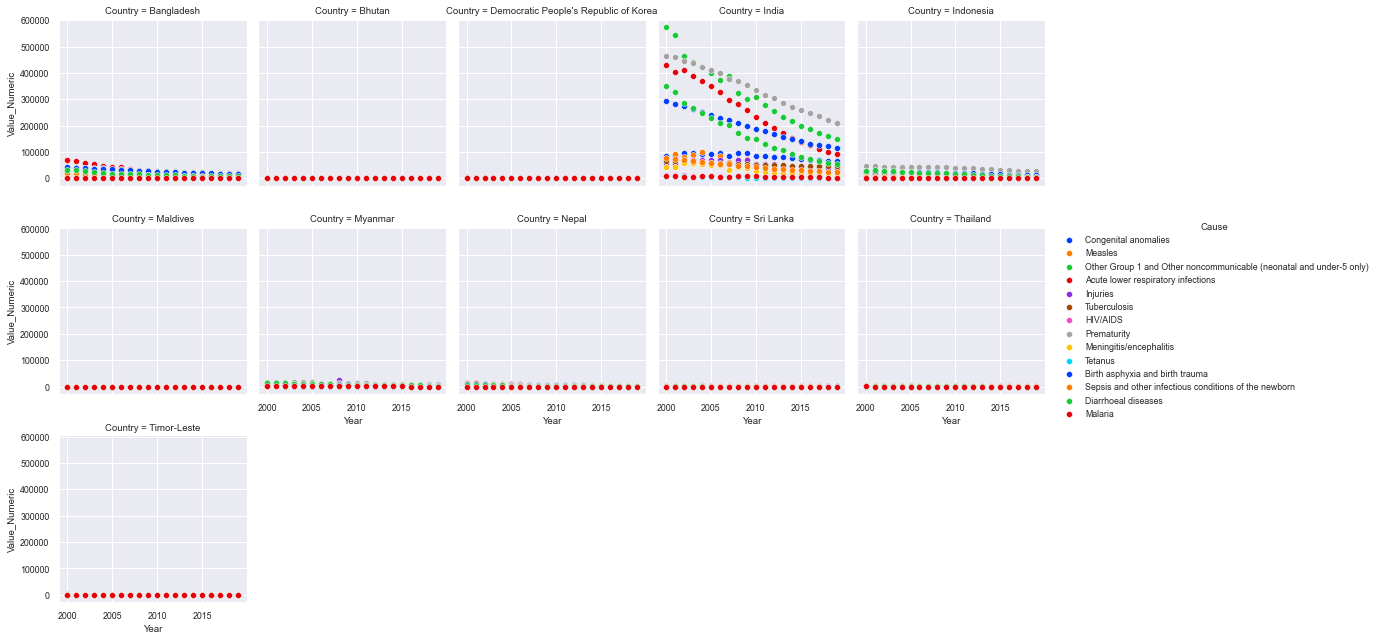

In [303]:
fig = plt.gcf()
fig.set_size_inches(20, 15)
grid = sns.FacetGrid(South_East , col = 'Country', hue = 'Cause',palette ='bright', col_wrap=5)
grid.map(sns.scatterplot, "Year","Value_Numeric" )

grid.add_legend()
plt.show()

### 6. Look into India's death rate data

In [304]:
India_data = copy_df.loc[copy_df['Country']=='India'][["Year","Cause","Country","Income_group","Value_Numeric"]]

In [305]:
India_2019 = India_data.loc[India_data['Year']==2019][["Year","Cause","Country","Value_Numeric"]]

#### In the year 2019 highest death rate is due to prematurity followed by other non communicable diseases followed by birth asphyxia 
#### Common non communicable diseases include anaemia, asthma, cancers, heart diseases

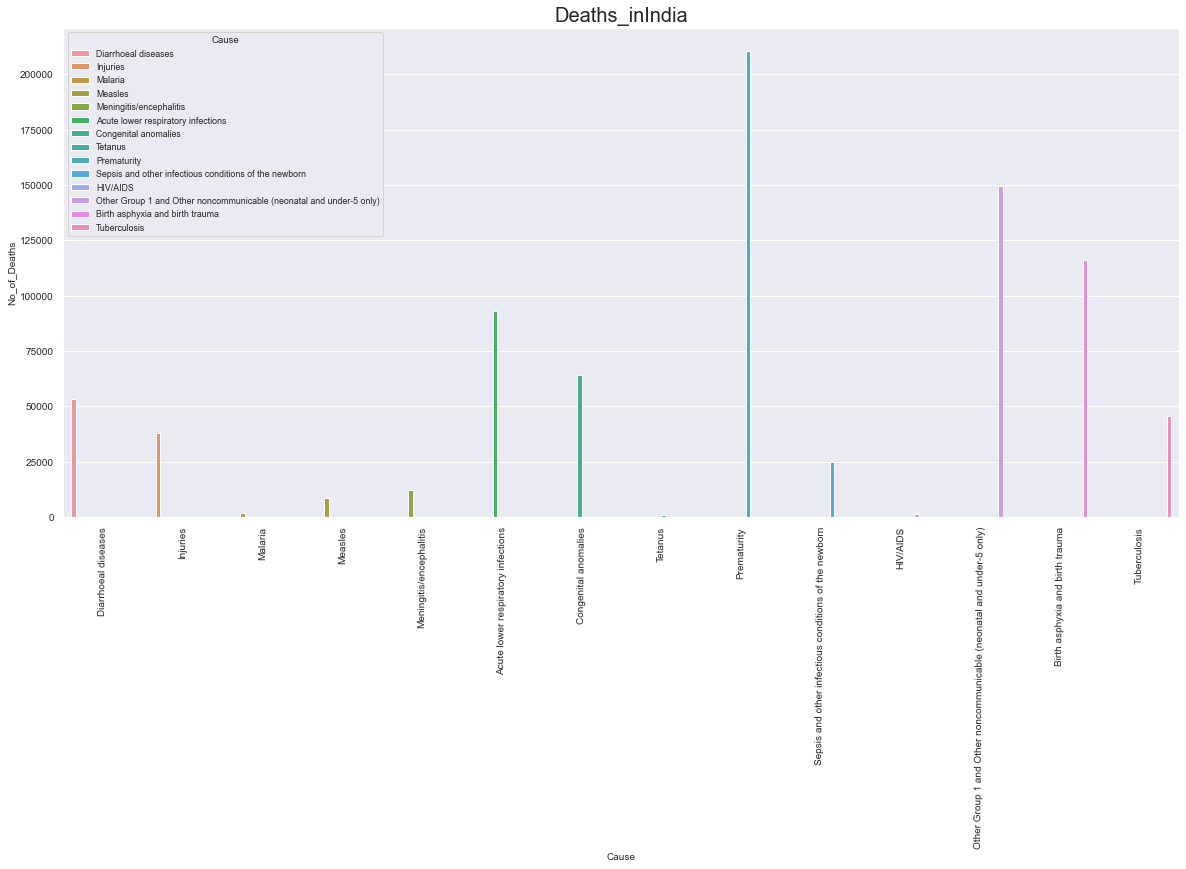

In [306]:
plt.figure(figsize=(20,9))
plt.xticks(rotation=89.5)
plt.title("Deaths_inIndia",fontsize=20)
b = sns.barplot(x=India_2019.Cause, y=India_2019.Value_Numeric, hue =India_2019.Cause)
plt.xlabel("Cause",fontsize=10)
plt.ylabel("No_of_Deaths",fontsize=10)
# b.set_xlabel("X Label",fontsize=30)
# b.set_ylabel("Y Label",fontsize=20)
plt.tick_params(labelsize=10)
plt.show();

## IV. Income group 

### 1. What income group does India have

#### India has only Lower middle income group 

<AxesSubplot:xlabel='Income_group', ylabel='count'>

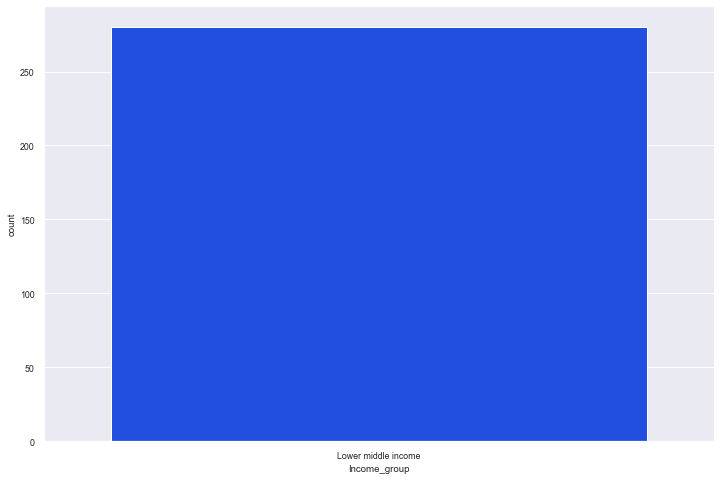

In [307]:
plt.figure(figsize=(12,8))
sns.countplot(x='Income_group',data =India_data,palette='bright')


### 2. Take out Income group for all the countries

#### Lower middle income and upper middle income count is more overall

#### Death rates are higher in the Lower middle income group, followed by Low income. High income shows no much death rates at all


In [308]:
Income_group = copy_df.groupby(['Income_group','Cause','Year','Region'], as_index=False)['Value_Numeric'].sum()

<AxesSubplot:xlabel='Income_group', ylabel='count'>

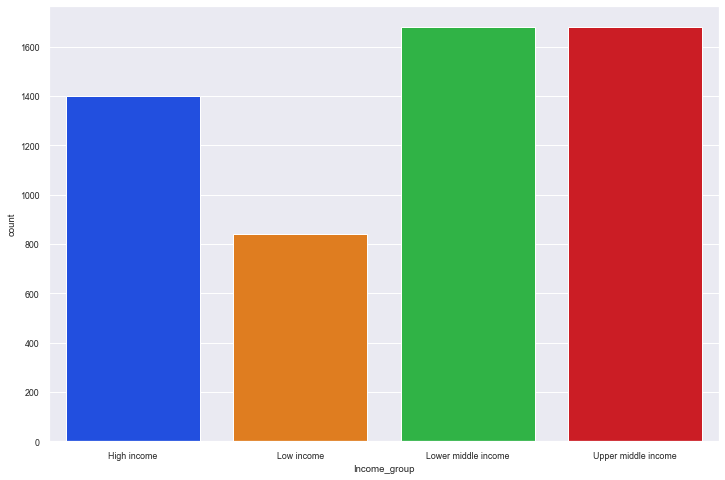

In [309]:
plt.figure(figsize=(12,8))
#colors = ['blue','green','orange', 'red']
sns.countplot(x='Income_group',data =Income_group,palette='bright' )


### 3.Find out the which Region has which income groups 

#### USA and Europe seems to have more of Upper middle income group 
#### Europe has the most high income groups among all the other countries
#### Africa has the most low income groups among all the other countries

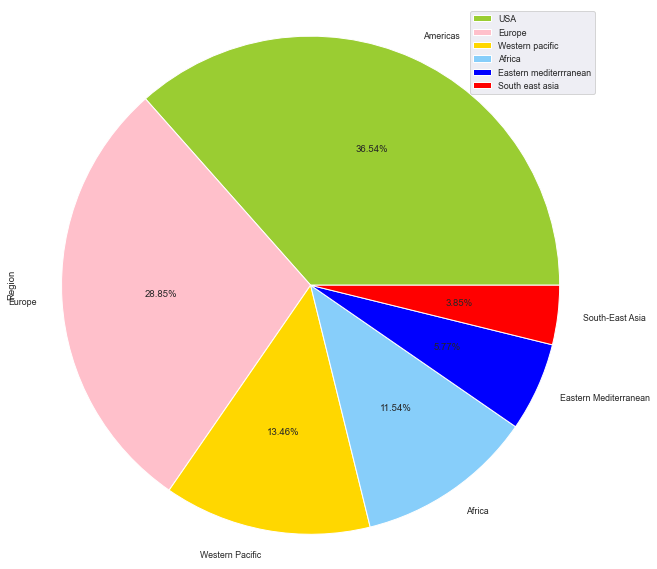

In [310]:
import random
import matplotlib.colors as mcolors

labels = ['USA', 'Europe','Western pacific', 'Africa','Eastern mediterrranean','South east asia']
plt.figure(figsize=(9,8))
colors = ['yellowgreen','pink', 'gold', 'lightskyblue', 'blue',"red"]
copy_df[copy_df['Income_group']== 'Upper middle income']['Region'].value_counts().sort_values(ascending=False).plot.pie(colors=colors,autopct='%1.2f%%')
plt.legend(labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

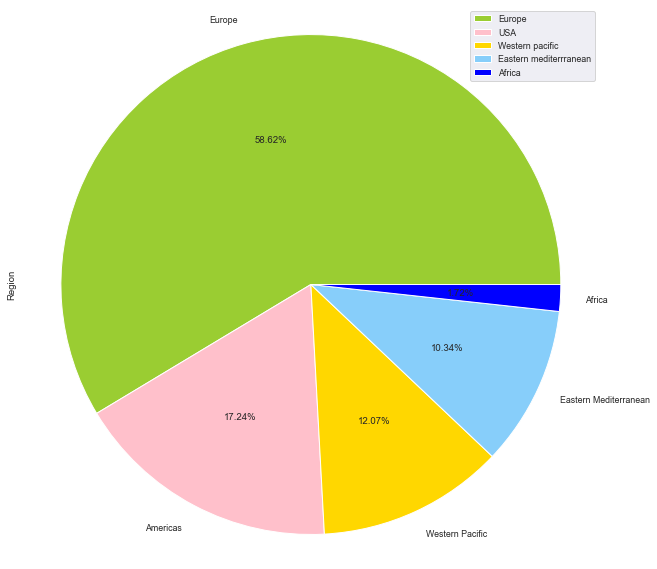

In [311]:


labels = ['Europe', 'USA','Western pacific', 'Eastern mediterrranean','Africa']
plt.figure(figsize=(9,8))
colors = ['yellowgreen','pink', 'gold', 'lightskyblue', 'blue',"red"]
copy_df[copy_df['Income_group']== 'High income']['Region'].value_counts().sort_values(ascending=False).plot.pie(colors=colors,autopct='%1.2f%%')
plt.legend(labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

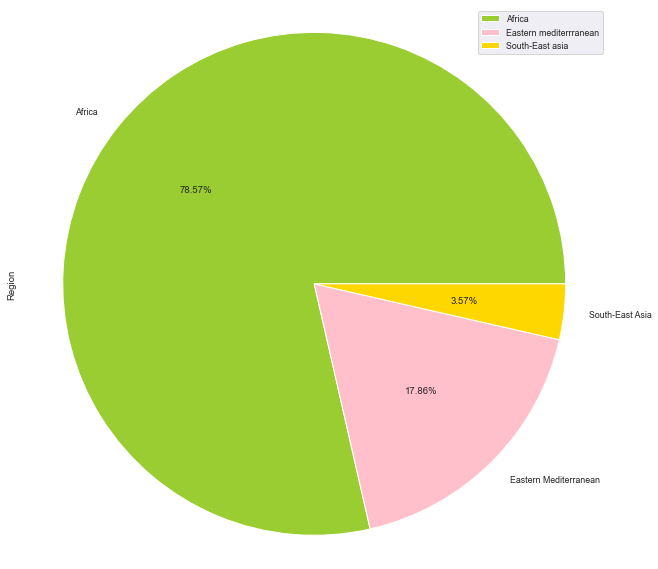

In [312]:

labels = ['Africa', 'Eastern mediterrranean','South-East asia']
plt.figure(figsize=(9,8))
colors = ['yellowgreen','pink', 'gold', 'lightskyblue', 'blue',"red"]
copy_df[copy_df['Income_group']== 'Low income']['Region'].value_counts().sort_values(ascending=False).plot.pie(colors=colors,autopct='%1.2f%%')
plt.legend(labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

# Inferences and conclusion

### Problem Statement

#### Year
1. PROBLEM STATEMENT :Is there a correlation between the year and mortality rates
-  ANS: There is a negative correlation between the Year and Number of under 5 deaths which means as the year increases the number of deaths has decreased

- The year 2000 has approximately 19.8 million under 5 mortality rates which is the highest of all the years
- But in the year 2019 the under 5 mortality rate has gone very much down from 19.8 million to around 10.5 million which is the lowest
- This may be due to various medical advances, Vaccination coverage and new diagnostic studies



2. PROBLEM STATEMENT: Each year which cause was the reason for maximum under5 mortality rates and which region gave the maximum death rates each year.
-  ANS: From the year 2000 to 2009 Malaria has been the causes of maximum deaths and from 2010 to 2019 ALRTI(Acute lower respiratory tract infection)has been the cause of maximum deaths

- The main reason might be because there is no vaccination for Malaria
- The malaria parasite has an extraordinary ability to evade the immune system, which may explain the failure of malaria vaccines to date.
- But in 2021 WHO has recommended RTS,S/AS01 vaccine to fight against malaria
- The next most common cause for max death rate is ALRTI which is mostly caused because of FLU
- There are many different flu viruses that circulate every year
- Despite being vaccinated kids still get FLU as a flu vaccine is made to protect against the three or four flu viruses that research suggests will be most common. There are many other different flu viruses that circulate every year

#### Cause
1. PROBLEM STATEMENT: Maximum death rates by each cause
- ANS: Malaria has the highest max deaths, followed by ALRTI and other non communicable diseases
- Reasons same as above
- Next most common causes for max death rates are Diarrhoeal diseases and prematurity
- Diarrhoeal diseases cause the next max death rate may be due to poor hygienic practices in many countries and also might be due to poor nutritional status
- Prematurity is the next cause for max death rate as many countries is unable to provide Specialized supportive care for the prematured babies


2. PROBLEM STATEMENT: Which cause was the reason for most no of deaths
- ANS: Malaria and ALRTI has been the cause for max death rates
- Reasons same as the above


3. PROBLEM STATEMENT: Total death rate due to each cause throughout the years
- ANS: ALRTI seems to be the cause of highest death rates globally
- Reasons same as the above 

#### Region
1. PROBLEM STATEMENT: Which region(along with the cause) has the highest(max) overall under5 death rates
- We know malaria and ALRTI are the reason for max death rates but we need to know which region had those max death rates
- ANS: Africa had the highest death rates due to both Malaria and ALRTI, followed by South-East Asia due to ALRTI,
- Europe and America has the lowest death rates of all

2. PROBLEM STATEMENT: 2.a) What is the cause for highest death rates due to vaccine preventable diseases
                      2.b) Which region has the highest death rates due to vaccine preventable diseases
- ANS: 2.a)Death rates are mostly due to Measles during 2000 to 2006 post which Tuberculosis, measles and meningitis has become the cause for highest death rates.
- Tetanus have always been the cause for the least death rates

- ANS: 2.b)Africa seems to have the highest death rates due to measles followed by south east asia due to Tuberculosis
- Europe and America have the least death rates due to vaccine preventable diseases.
- Africa is the second most populous region may be the vaccination coverage is less 
- Certain people doubt the vaccine safety may be that is why the death rates are high in India and Africa even for vaccine preventable diseases
- In the year 2019 Africa still seems to have the highest death rates among all the other countries


3. PROBLEM STATEMENT: Which region has the highest number of under 5 mortality rates
- ANS: South East Asia seems to have the highest under 5 mortality rates overall

4. PROBLEM STATEMENT: Death rates by contagious diseases(ALRTI,Sepsis and other infectious conditions of the newborn,HIV,diarrhoeal diseases) in all the regions
- ANS: I have taken only year 2019
- Death rates due to non contagious diseases seems to be higher in all the countries compared to contagious disease
- one of the reasion may be routine vaccinations are administered for contagious diseases while non contagious diseases however cannot be prevented but can be detected, screened at the early stage and provide access to palliative care for people in need
- Timely treatment and early treatment can reduce the death rates due to non contagious diseases

5. PROBLEM STATEMENT: Look for South east region death rate distribution
- ANS: India seems to have the highest death rates compared to other South-East asian countries
- However India's population is higher than all the other countries population

6. PROBLEM STATEMENT:  Look into India's death rate data
- ANS: In the year 2019 highest death rate is due to prematurity followed by other non communicable diseases followed by birth asphyxia 
- Common non communicable diseases include anaemia, asthma, cancers, heart diseases


#### Income group
1. PROBLEM STATEMENT: Which income group people have most death rates
- ANS: Death rates in the Lower middle income group is more, followed by Low income. High income shows no much death rates at all

2. PROBLEM STATEMENT: Take out Income group for all the countries
- ANS: Lower middle income and upper middle income count is more overall

3. PROBLEM STATEMENT: Find out the which Region has which income groups
- ANS: USA and Europe seems to have more of Upper middle income group
- Europe has the most high income groups among all the other countries
- Africa has the most low income groups among all the other countries